# Tarea 8

## Para entregar el miércoles 21 de octubre de 2015

**1. Péndulo doble**

Un péndulo doble consiste de una masa $m_1$ suspendida de un punto fijo mediante una varilla sin masa, de longitud $\ell_1$, y una masa $m_2$ suspendidad de $m_1$ mediante una varilla sin masa, de longitud $\ell_2$.

[1] (i) Deduce las ecuaciones de movimiento del péndulo doble.

** Solución: **

Las ecuaciones de movimiento del péndulo doble se derivan desde el formalismo Lagrangiano. La derivación misma no es difícil, pero sí es algebráicamente pesada. Por esto, pongo los resultados directamente:

$$
(m_1 + m_2)\ell_1 \ddot{\theta}_1 + m_2 \ell_2 \ddot{\theta}_2 \cos(\theta_1 - \theta_2) + m_2 \ell_2 \dot{\theta}_2^2 \sin(\theta_1 - \theta_2) + g (m_1 + m_2) \sin(\theta_1) = 0
$$

$$
m_2 \ell_2 \ddot{\theta}_2 + m_2 \ell_1 \ddot{\theta}_1 \cos(\theta_1 - \theta_2) - m_2 \ell_1 \dot{\theta}_1^2 \sin(\theta_1 - \theta_2) + m_2 g \sin(\theta_2) = 0
$$

Necesitamos transformarlos para obtener $\ddot{\theta}_1$ y $\ddot{\theta}_2$ explícitamente. Para esto, sustituimos la segunda ecuación en la primera y al revés. Esto se hace en Mathematica y se obtiene que:

$$
\ddot{\theta}_1 = - \frac{g(2m_1 + m_2) \sin(\theta_1) + m_2 (g \sin(\theta_1 - 2\theta_2) + 2(\dot{\theta}_2^2 \ell_2 + \dot{\theta}_1^2 \ell_1 \cos(\theta_1 - \theta_2))\sin(\theta_1 - \theta_2))}{2\ell_1 (m_1 + m_2 - m_2 \cos(\theta_1-\theta_2)^2)}
$$

$$
\ddot{\theta}_2 = \frac{(\dot{\theta}_1^2 \ell_1 (m_1+m_2) + g (m_1 + m_2) \cos(\theta_1) + \dot{\theta}_2^2 \ell_2 m_2 \cos(\theta_1 - \theta_2))\sin(\theta_1 - \theta_2)}{\ell_2 (m_1 + m_2 - m_2 \cos(\theta_1-\theta_2)^2)}
$$

Entonces, si el vector de estado es $(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2)$, la función de evolución del péndulo en código se vuelve:

In [3]:
# Función de evolución con parámetros del sistema
function F_doble(t, y, g=9.8, m1=1, m2=1, l1=1, l2=1)
    θ1 = y[1]
    θ2 = y[2]
    dθ1 = y[3]
    dθ2 = y[4]
    
    # Resultados de la evolución
    y1 = dθ1
    y2 = dθ2
    
    y3 = -(g*(2m1 + m2)*sin(θ1) + m2*(g*sin(θ1 - 2θ2) + 2*(dθ2^2*l2 + dθ1^2*l1*cos(θ1 - θ2))*sin(θ1 - θ2)))/(2*l1*(m1 + m2 - m2*cos(θ1 - θ2)))
    y4 = (sin(θ1 - θ2) * (dθ1^2*l1*(m1 + m2) + g*(m1 + m2)*cos(θ1) + dθ2^2*l2*m2*cos(θ1 - θ2)))/(l2*(m1 + m2 - m2*cos(θ1 - θ2)^2))
    
    return [y1, y2, y3, y4]
end

F_doble (generic function with 6 methods)

(ii) Averigua cómo funciona el paquete `ODE.jl`.

(iii) Utiliza distintas funciones del paquete `ODE.jl` para integrar las ecuaciones del péndulo. 

In [4]:
using ODE;

# Las condiciones iniciales será un péndulo tal que la primera masa es horizontal y la segunda es
# vertical respecto a la gravedad.
y_initial = [π/2, 0, 0, 0]

# Ahora integramos y obtenemos la trayectoria del sistema hasta 100 segundos
tout, yout = ode23(F_doble, y_initial, [0,100]);

(iv) Haz figuras y animaciones para ver qué está pasando.

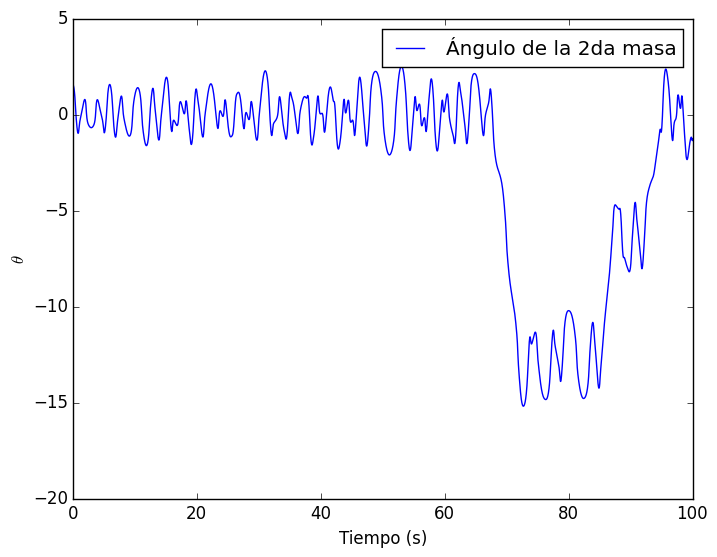

PyObject <matplotlib.legend.Legend object at 0x7fd0a0293f28>

In [8]:
using PyPlot;

ys = [yout[i][1] for i in 1:length(yout)]
plot(tout, ys, label="Ángulo de la 1ra masa")
xlabel("Tiempo (s)")
ylabel(L"\theta")
legend()

(v) Calcula la distancia entre dos condiciones iniciales muy cercanas en el tiempo. ¿Qué observas? ¿Qué implica sobre el sistema?

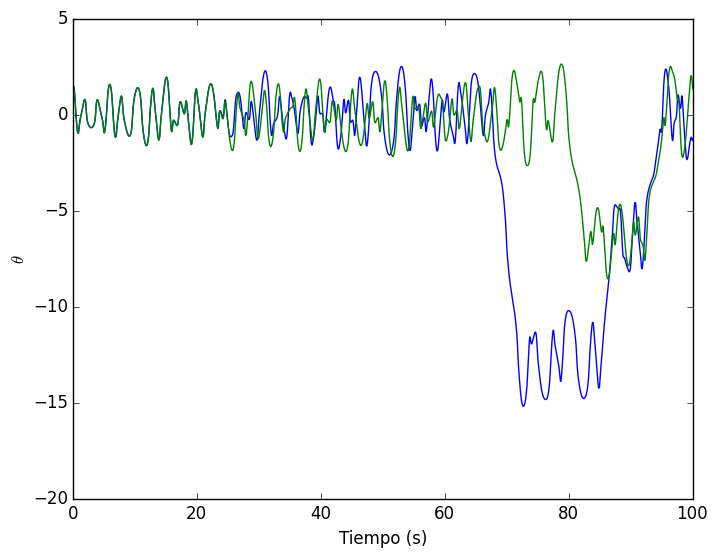

PyObject <matplotlib.text.Text object at 0x7fd0a1b1ce10>

In [10]:
### 
using ODE;

# Las condiciones iniciales será un péndulo tal que la primera masa es _casi_ horizontal y la segunda es
# vertical respecto a la gravedad.
y_initial2 = [π/2 - 1e-8, 0, 0, 0]

# Ahora integramos y obtenemos la trayectoria del sistema ligeramente perturbado hasta 100 segundos
tout2, yout2 = ode23(F_doble, y_initial2, [0,100]);

# Graficamos la solución original y la perturbada para ver si divergen

using PyPlot;

ys2 = [yout2[i][1] for i in 1:length(yout2)]
plot(tout, ys, label="Ángulo de la 1ra masa (original)")
plot(tout2, ys2, label="Ángulo de la 1ra masa (perturbada)")
xlabel("Tiempo (s)")
ylabel(L"\theta")

**Discusión:**

Es evidente que con una diferencia mínima ($1 \cdot 10^{-8}$) en el ángulo inicial, las soluciones empiezan a diverger severamente después de tan solo 30 segundos. Esto es un comportamiento *caótico*.

(vi) Grafica un corte del espacio fase, correspondiente a las coordenadas de los dos péndulos, para distintas condiciones iniciales. ¿Qué observas?

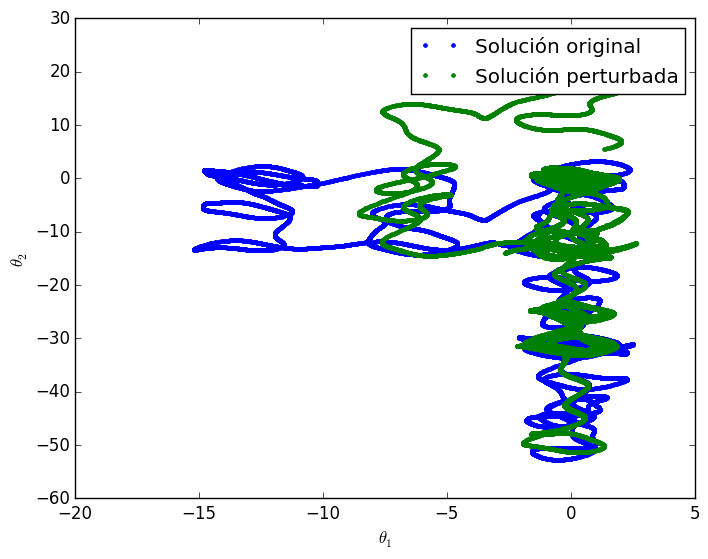

PyObject <matplotlib.text.Text object at 0x7fd0a17a6e80>

In [19]:
plot([yout[i][1] for i in 1:length(yout)], [yout[i][2] for i in 1:length(yout)], ".", label="Solución original")
plot([yout2[i][1] for i in 1:length(yout2)], [yout2[i][2] for i in 1:length(yout2)], ".", label="Solución perturbada")
legend()
xlabel(L"\theta_1")
ylabel(L"\theta_2")

** Discusión:**

Se observa lo mismo, i.e. la dependencia muy fuerte en condiciones iniciales.

**2. Reacción-difusión**

Una ecuación ligeramente distinta en apariencia, pero radicalmente distinta en comportamiento, de la ecuación de difusión es la siguiente ecuación de **reacción-difusión**; el primer se puede condiderar como modelando una reacción química local, o el crecimiento local de una población de animales:

$$\frac{\partial u}{\partial t} = u(1-u) + \nabla^2 u.$$

[2] Considera la ecuación en 1D en el intervalo $[0,L]$.

(i) Discretiza la ecuación en el lugar $(x_i, t_n)$ de la malla. ¿Qué pasa con el primer término de lado derecho en este sitio?

**Solución:**

Usamos el FTCS para obtener:

$$
\frac{u^{t+1}_x - u_x^t}{k} = u_x^t (1 - u_x^t) + \frac{u_{x+1}^t - 2u_x^t + u^t_{x-1}}{h^2}
$$

De donde obtenemos la ecuación de evolución:

$$
u_x^{t+1} = u_x^t + ku_x^t (1 - u_x^t) + \frac{k(u_{x+1}^t - 2u_x^t + u^t_{x-1})}{h^2}
$$

(ii) Simula el sistema con distintas condiciones iniciales y condiciones periódicas de frontera y dibuja la evolución, por ejemplo con una animación. ¿Qué observas? ¿Qué está pasando físicamente? ¿Cuál es el comportamiento asintótico del sistema?

**Solución:**

Primero, la estabilidad de la solución requiere que $\frac{k}{h^2} \leq \frac12$. Si usamos una malla uniforme con longitud espacial $L$ y temporal $T$, entonces esta condición se traduce a

$$
N_T \geq 2T \frac{N_L^2}{L^2} \: ,
$$
donde $N_L$ y $N_T$ son los números de divisiones de sus escalas respectivas. En código:

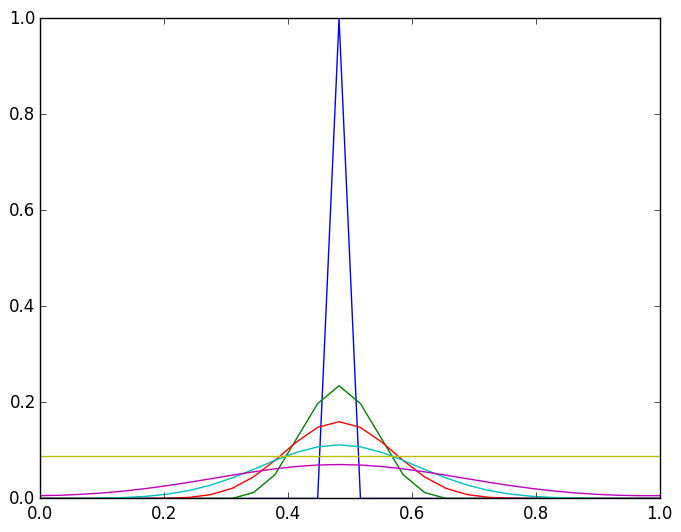

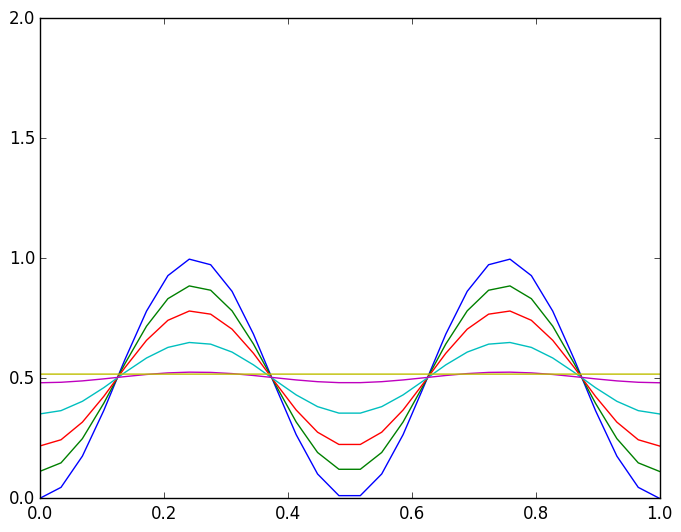

(0,2)

In [25]:
L = 1 # Longitud espacial
T = 1 # Longitud temporal

N_L = 30 # Número de divisiones longitudinales
N_T = Int(max(N_L, ceil(3*T*N_L^2/(L^2)))) # Número de divisiones temporales que garantiza estabilidad

k = T/N_T
h = L/N_L

mesh = Array{Float64}(N_T, N_L) # Creamos la malla
fill!(mesh, 0) # Y la llenamos de ceros

# Ahora especificamos las condiciones iniciales (como una delta de Dirac)
mesh[1,Int(floor(N_L/2))] = 1

for t in 1:(N_T-1)
    # Usamos las condiciones de frontera periódicas
    mesh[t+1,1] = mesh[t,1] + k*mesh[t,1]*(1-mesh[t,1]) + (k*(mesh[t, 2] - 2*mesh[t,1] + mesh[t,N_L-1]))/(h^2)
    mesh[t+1,N_L] = mesh[t+1,1]
    
    for x in 2:(N_L-1)
        mesh[t+1,x] = mesh[t,x] + k*mesh[t,x]*(1-mesh[t,x]) + (k*(mesh[t, x+1] - 2*mesh[t,x] + mesh[t,x-1]))/(h^2)
    end
end

for t in Any[1, 5, 10, 20, 50, N_T-1]
    plot(linspace(0, L, N_L), transpose(mesh[ceil(t),:]), "-");
end
ylim(0, 1)

# Otras condiciones pueden, por ejemplo, ser senoidales:

for n in 1:N_L
    mesh[1,n] = (sin(2π*(n-1)/(N_L-1)))^2
end

for t in 1:(N_T-1)
    # Usamos las condiciones de frontera periódicas
    mesh[t+1,1] = mesh[t,1] + k*mesh[t,1]*(1-mesh[t,1]) + (k*(mesh[t, 2] - 2*mesh[t,1] + mesh[t,N_L-1]))/(h^2)
    mesh[t+1,N_L] = mesh[t+1,1]
    
    for x in 2:(N_L-1)
        mesh[t+1,x] = mesh[t,x] + k*mesh[t,x]*(1-mesh[t,x]) + (k*(mesh[t, x+1] - 2*mesh[t,x] + mesh[t,x-1]))/(h^2)
    end
end
figure()

for t in Any[1, 5, 10, 20, 50, 200]
    plot(linspace(0, L, N_L), transpose(mesh[ceil(t),:]), "-");
end
ylim(0, 2)

**Discusión:**

En ambos casos, lo que se observa en la evolución temporal (funciones coloreadas que convergen a una contante) es que las irregularidades en la distribución de $u$ se "planchan" y llegan asintóticamente al promedio de las condiciones iniciales.

(iii) ¿Qué ocurre al utilizar condiciones de frontera reflejantes?

[3] Simula el sistema en 2D. ¿Qué observas? ¿Qué es lo que modela la ecuación?

In [26]:
### La generalización a 2D es sencilla, así que la hacemos en código de una vez:

Lx = 1 # Longitud espacial x
Ly = 1 # Longitud espacial y
T = 1 # Longitud temporal

N_L = 30 # Número de divisiones longitudinales
N_T = Int(max(N_L, ceil(3*T*N_L^2/(L^2)))) # Número de divisiones temporales que garantiza estabilidad

k = T/N_T
h = L/N_L

mesh = Array{Float64}(N_T, N_L, N_L) # Creamos la malla
fill!(mesh, 0) # Y la llenamos de ceros

# Ahora especificamos las condiciones iniciales (como una delta de Dirac en el centro)
mesh[1,Int(floor(N_L/2)),Int(floor(N_L/2))] = 2

for t in 1:(N_T-1)
    # No usamos las condiciones de frontera aquí.Usamos las condiciones de frontera periódicas
    #mesh[t+1,1] = mesh[t,1] + k*mesh[t,1]*(1-mesh[t,1]) + (k*(mesh[t, 2] - 2*mesh[t,1] + mesh[t,N_L-1]))/(h^2)
    #mesh[t+1,N_L] = mesh[t+1,1]
    
    for x in 2:(N_L-1)
        for y in 2:(N_L-1)
            mesh[t+1, x, y] = mesh[t,x,y] + k*mesh[t,x,y]*(1-mesh[t,x,y]) + (k*(mesh[t, x+1, y] - 2*mesh[t,x, y] + mesh[t,x-1, y]))/(h^2) + (k*(mesh[t, x, y+1] - 2*mesh[t, x, y] + mesh[t,x, y-1]))/(h^2)
        end
    end
end

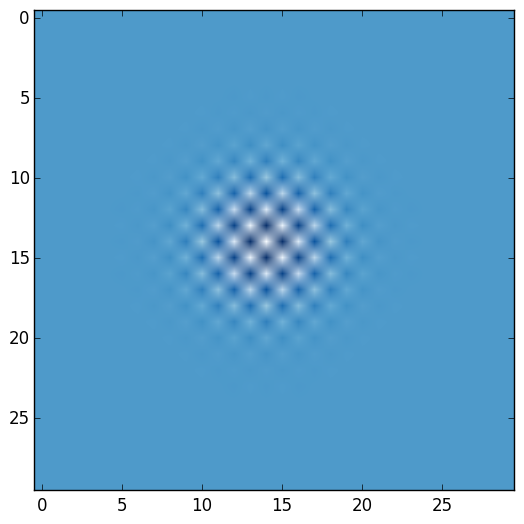

PyObject <matplotlib.image.AxesImage object at 0x7f16a61e3780>

In [34]:
im = [10*mesh[20,x,y] for x in 1:N_L, y in 1:N_L]
imshow(im, cmap="Blues")

**Discusión:**

Se observa un comportamiento inestable (i.e. no es difusión simple) conforme avanza el tiempo. Esta ecuación puede, por ejemplo, mostrar la evolución de una especie sobre un plano.